#Importing necessary libraries & dataset

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor

import statsmodels.api as sm
from tqdm import tqdm


import warnings
warnings.filterwarnings("ignore")

In [ ]:
# Loading flights.csv data into a DataFrame
df_flight = pd.read_csv('flights.csv')


In [ ]:
# Display the first 5 rows of the flights.csv data to get an overview of the dataset
df_flight.head()

,Searched Date,Departure Date,Arrival Date,Flight Lands Next Day,Departure Airport,Arrival Airport,Number Of Stops,Route,Airline,Cabin,Price
0,2024-06-30,2024-07-16 23:48:00,2024-07-17 15:03:00,1,LAS,BOS,1,ATL,Spirit Airlines,Economy,$83
1,2024-06-30,2024-07-16 09:34:00,2024-07-16 19:43:00,0,LAS,BOS,1,EWR,Spirit Airlines,Economy,$100
2,2024-06-30,2024-07-16 23:48:00,2024-07-17 15:03:00,1,LAS,BOS,1,ATL,Spirit Airlines,Economy,$78
3,2024-06-30,2024-07-16 08:30:00,2024-07-16 19:37:00,0,LAS,BOS,1,IAH,Spirit Airlines,Economy,$100
4,2024-06-30,2024-07-16 07:00:00,2024-07-16 16:36:00,0,LAS,BOS,1,ORD,American Airlines,Basic Economy,$148


# Data Exploration

##Check all the columns

In [ ]:
df_flight.columns

Index(['Searched Date', 'Departure Date', 'Arrival Date',
       'Flight Lands Next Day', 'Departure Airport', 'Arrival Airport',
       'Number Of Stops', 'Route', 'Airline', 'Cabin', 'Price'],
      dtype='object')

#### Data Information :
Searched Date: Likely represents the date when the flight search was conducted.

Departure Date: The date on which the flight is scheduled to depart.

Arrival Date: The date when the flight is expected to arrive at the destination.

Flight Lands Next Day: A boolean or categorical indicator showing whether the flight lands the next day after departure.

Departure Airport: The airport code or name from which the flight departs.

Arrival Airport: The airport code or name where the flight arrives.

Number Of Stops: Indicates the number of stops the flight makes between departure and arrival.

Route: The path or sequence of stops the flight follows from departure to arrival.

Airline: The airline operating the flight.

Cabin: The cabin class, such as Economy, Business, or First Class.

Price: The price of the flight ticket.


##Check shape of the imported datasets

In [ ]:
print(f"The dataset for flights price prediction has {df_flight.shape[0]} data points and {df_flight.shape[1]} features.")


The dataset for flights price prediction has 317260 data points and 11 features.


##Check for missing values

In [ ]:
df_flight.isnull().sum()

,0
Searched Date,0
Departure Date,0
Arrival Date,0
Flight Lands Next Day,0
Departure Airport,0
Arrival Airport,0
Number Of Stops,0
Route,38397
Airline,0
Cabin,0


#### Insights :
The Route column has 38,397 missing values, while all other columns have no missing data.

## Check dataset information

In [ ]:
df_flight.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 317260 entries, 0 to 317259
Data columns (total 11 columns):
 #   Column                 Non-Null Count   Dtype 
---  ------                 --------------   ----- 
 0   Searched Date          317260 non-null  object
 1   Departure Date         317260 non-null  object
 2   Arrival Date           317260 non-null  object
 3   Flight Lands Next Day  317260 non-null  int64 
 4   Departure Airport      317260 non-null  object
 5   Arrival Airport        317260 non-null  object
 6   Number Of Stops        317260 non-null  int64 
 7   Route                  278863 non-null  object
 8   Airline                317260 non-null  object
 9   Cabin                  317260 non-null  object
 10  Price                  317260 non-null  object
dtypes: int64(2), object(9)
memory usage: 26.6+ MB


#### Insights :
The DataFrame df_flight consists of 317,260 entries with 11 columns, where most columns are of object type, and only "Flight Lands Next Day," "Number of Stops," and "Price" are of int64 type; the "Route" column has missing data.

## Converting fields into correct datatypes

In [ ]:
# Convert 'Searched Date ', 'Departure Date' and 'Arrival Date ' to datetime objects
df_flight['Searched Date'] = pd.to_datetime(df_flight['Searched Date'])
df_flight['Departure Date'] = pd.to_datetime(df_flight['Departure Date'])
df_flight['Arrival Date'] = pd.to_datetime(df_flight['Arrival Date'])

# Convert 'Price' to numeric (integer)
df_flight['Price'] = df_flight['Price'].str.replace('$', '').str.replace(',', '').astype('int')
df_flight.head()

,Searched Date,Departure Date,Arrival Date,Flight Lands Next Day,Departure Airport,Arrival Airport,Number Of Stops,Route,Airline,Cabin,Price
0,2024-06-30,2024-07-16 23:48:00,2024-07-17 15:03:00,1,LAS,BOS,1,ATL,Spirit Airlines,Economy,83
1,2024-06-30,2024-07-16 09:34:00,2024-07-16 19:43:00,0,LAS,BOS,1,EWR,Spirit Airlines,Economy,100
2,2024-06-30,2024-07-16 23:48:00,2024-07-17 15:03:00,1,LAS,BOS,1,ATL,Spirit Airlines,Economy,78
3,2024-06-30,2024-07-16 08:30:00,2024-07-16 19:37:00,0,LAS,BOS,1,IAH,Spirit Airlines,Economy,100
4,2024-06-30,2024-07-16 07:00:00,2024-07-16 16:36:00,0,LAS,BOS,1,ORD,American Airlines,Basic Economy,148


In [ ]:
df_flight.dtypes

,0
Searched Date,datetime64[ns]
Departure Date,datetime64[ns]
Arrival Date,datetime64[ns]
Flight Lands Next Day,int64
Departure Airport,object
Arrival Airport,object
Number Of Stops,int64
Route,object
Airline,object
Cabin,object


In [ ]:
# difference between search date and departure date and add as days before travel number of days
df_flight['DaysBeforeTravel'] = ((df_flight['Departure Date']) - (df_flight['Searched Date'])).dt.days
df_flight.head()

,Searched Date,Departure Date,Arrival Date,Flight Lands Next Day,Departure Airport,Arrival Airport,Number Of Stops,Route,Airline,Cabin,Price,DaysBeforeTravel
0,2024-06-30,2024-07-16 23:48:00,2024-07-17 15:03:00,1,LAS,BOS,1,ATL,Spirit Airlines,Economy,83,16
1,2024-06-30,2024-07-16 09:34:00,2024-07-16 19:43:00,0,LAS,BOS,1,EWR,Spirit Airlines,Economy,100,16
2,2024-06-30,2024-07-16 23:48:00,2024-07-17 15:03:00,1,LAS,BOS,1,ATL,Spirit Airlines,Economy,78,16
3,2024-06-30,2024-07-16 08:30:00,2024-07-16 19:37:00,0,LAS,BOS,1,IAH,Spirit Airlines,Economy,100,16
4,2024-06-30,2024-07-16 07:00:00,2024-07-16 16:36:00,0,LAS,BOS,1,ORD,American Airlines,Basic Economy,148,16


In [ ]:
# travel time in hours
df_flight['TravelTime'] = ((df_flight['Arrival Date']) - (df_flight['Departure Date'])).dt.total_seconds()/3600
df_flight.head()

,Searched Date,Departure Date,Arrival Date,Flight Lands Next Day,Departure Airport,Arrival Airport,Number Of Stops,Route,Airline,Cabin,Price,DaysBeforeTravel,TravelTime
0,2024-06-30,2024-07-16 23:48:00,2024-07-17 15:03:00,1,LAS,BOS,1,ATL,Spirit Airlines,Economy,83,16,15.250000
1,2024-06-30,2024-07-16 09:34:00,2024-07-16 19:43:00,0,LAS,BOS,1,EWR,Spirit Airlines,Economy,100,16,10.150000
2,2024-06-30,2024-07-16 23:48:00,2024-07-17 15:03:00,1,LAS,BOS,1,ATL,Spirit Airlines,Economy,78,16,15.250000
3,2024-06-30,2024-07-16 08:30:00,2024-07-16 19:37:00,0,LAS,BOS,1,IAH,Spirit Airlines,Economy,100,16,11.116667
4,2024-06-30,2024-07-16 07:00:00,2024-07-16 16:36:00,0,LAS,BOS,1,ORD,American Airlines,Basic Economy,148,16,9.600000


##Drop unnecessary columns

In [ ]:
df_flight = df_flight.drop(['Searched Date', 'Departure Date', 'Arrival Date'], axis=1)
df_flight.head()

,Flight Lands Next Day,Departure Airport,Arrival Airport,Number Of Stops,Route,Airline,Cabin,Price,DaysBeforeTravel,TravelTime
0,1,LAS,BOS,1,ATL,Spirit Airlines,Economy,83,16,15.250000
1,0,LAS,BOS,1,EWR,Spirit Airlines,Economy,100,16,10.150000
2,1,LAS,BOS,1,ATL,Spirit Airlines,Economy,78,16,15.250000
3,0,LAS,BOS,1,IAH,Spirit Airlines,Economy,100,16,11.116667
4,0,LAS,BOS,1,ORD,American Airlines,Basic Economy,148,16,9.600000


## Data statistic description

In [ ]:
df_flight['Price'].describe()

,Price
count,317260.000000
mean,359.891647
std,214.971750
min,15.000000
25%,217.000000
50%,316.000000
75%,457.000000
max,3688.000000


####Insights :
The summary statistics for the "Price" column show that the average flight price is approximately 359.89, with a standard deviation of 214.97, indicating moderate variability. The prices range from a minimum of 15 to a maximum of 3688, with the median (50th percentile) price at 316, suggesting that the distribution is skewed with a long tail towards higher prices.

<Figure size 1000x600 with 0 Axes>

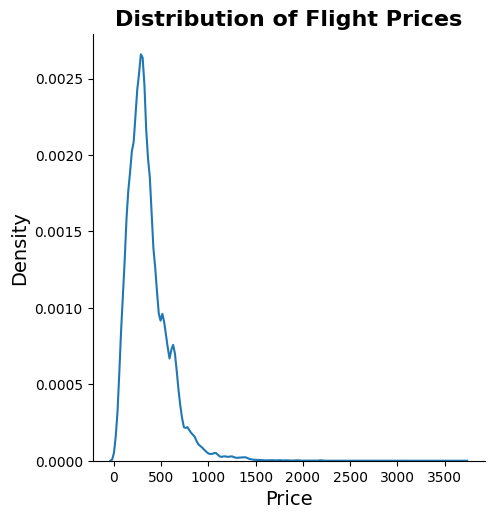

In [ ]:
# Create the KDE plot
plt.figure(figsize=(10, 6))
sns.displot(df_flight['Price'], kind='kde', palette='pastel')

# Add titles and labels
plt.title('Distribution of Flight Prices', fontsize=16, weight='bold')
plt.xlabel('Price', fontsize=14)
plt.ylabel('Density', fontsize=14)

# Show the plot
plt.show()


#### Insights :
The distribution of flight prices is highly right-skewed, with most prices concentrated below 1000, indicating that lower prices are more common.

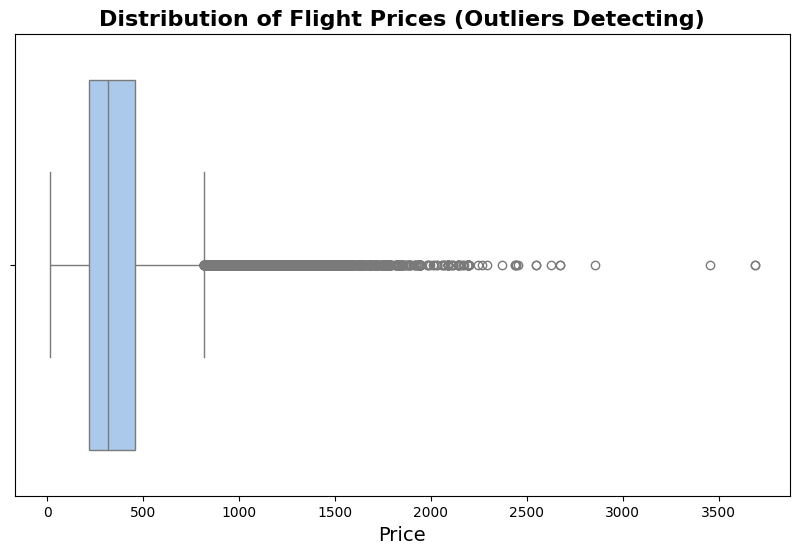

In [ ]:
# Create the box plot with customized aesthetics
plt.figure(figsize=(10, 6))
sns.boxplot(x=df_flight['Price'], palette='pastel')

# Add titles and labels
plt.title('Distribution of Flight Prices (Outliers Detecting)', fontsize=16, weight='bold')
plt.xlabel('Price', fontsize=14)

# Show the plot
plt.show()


#### Insights :
The boxplot shows that flight prices have a significant number of outliers above approximately 1000, with the majority of prices concentrated between around 200 and 600, indicating a highly skewed distribution with several high-value outliers.

## Outlier Treatment

In [ ]:
# remove prices over 1000, mostly outliers
#df_flight = df_flight[df_flight['Price'] < 1000]
# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = df_flight['Price'].quantile(0.25)
Q3 = df_flight['Price'].quantile(0.75)

# Calculate IQR
IQR = Q3 - Q1

# Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter the dataset to remove outliers
df_flight_no_outliers = df_flight[(df_flight['Price'] >= lower_bound) & (df_flight['Price'] <= upper_bound)]

# Display the resulting dataset
print(df_flight_no_outliers)


        Flight Lands Next Day Departure Airport Arrival Airport  \
0                           1               LAS             BOS   
1                           0               LAS             BOS   
2                           1               LAS             BOS   
3                           0               LAS             BOS   
4                           0               LAS             BOS   
...                       ...               ...             ...   
317255                      0               LAS             BOS   
317256                      0               LAS             BOS   
317257                      1               LAS             BOS   
317258                      1               LAS             BOS   
317259                      0               LAS             BOS   

        Number Of Stops Route            Airline          Cabin  Price  \
0                     1   ATL    Spirit Airlines        Economy     83   
1                     1   EWR    Spirit Airline

too many airlines and routes


In [ ]:
# modify the dataframe to only keep top 10 airlines
top_10_airlines = df_flight['Airline'].value_counts().head(10).index
df_flight = df_flight[df_flight['Airline'].isin(top_10_airlines)]
df_flight


,Flight Lands Next Day,Departure Airport,Arrival Airport,Number Of Stops,Route,Airline,Cabin,Price,DaysBeforeTravel,TravelTime
0,1,LAS,BOS,1,ATL,Spirit Airlines,Economy,83,16,15.250000
1,0,LAS,BOS,1,EWR,Spirit Airlines,Economy,100,16,10.150000
2,1,LAS,BOS,1,ATL,Spirit Airlines,Economy,78,16,15.250000
3,0,LAS,BOS,1,IAH,Spirit Airlines,Economy,100,16,11.116667
4,0,LAS,BOS,1,ORD,American Airlines,Basic Economy,148,16,9.600000
...,...,...,...,...,...,...,...,...,...,...
317255,0,LAS,BOS,1,DEN,United Airlines,Basic Economy,219,17,10.716667
317256,0,LAS,BOS,1,PHX,American Airlines,Basic Economy,218,17,10.700000
317257,1,LAS,BOS,1,IAD,United Airlines,Economy,198,17,10.783333
317258,1,LAS,BOS,1,JFK,JetBlue,Blue Basic,154,17,13.466667


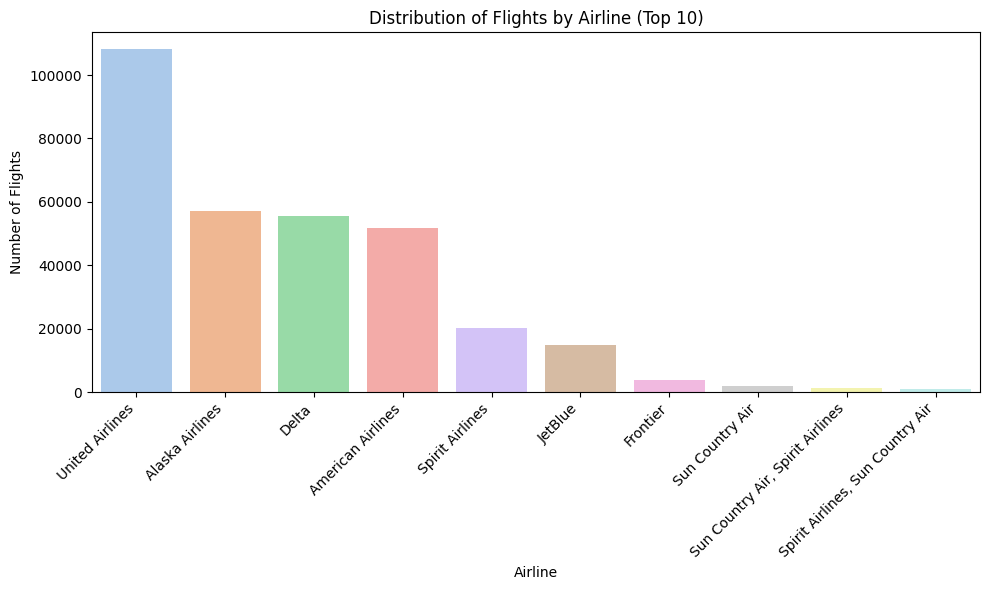

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df_flight, x='Airline', order=df_flight['Airline'].value_counts().index, palette='pastel')
plt.xticks(rotation=45, ha='right')
plt.title('Distribution of Flights by Airline (Top 10)')
plt.xlabel('Airline')
plt.ylabel('Number of Flights')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


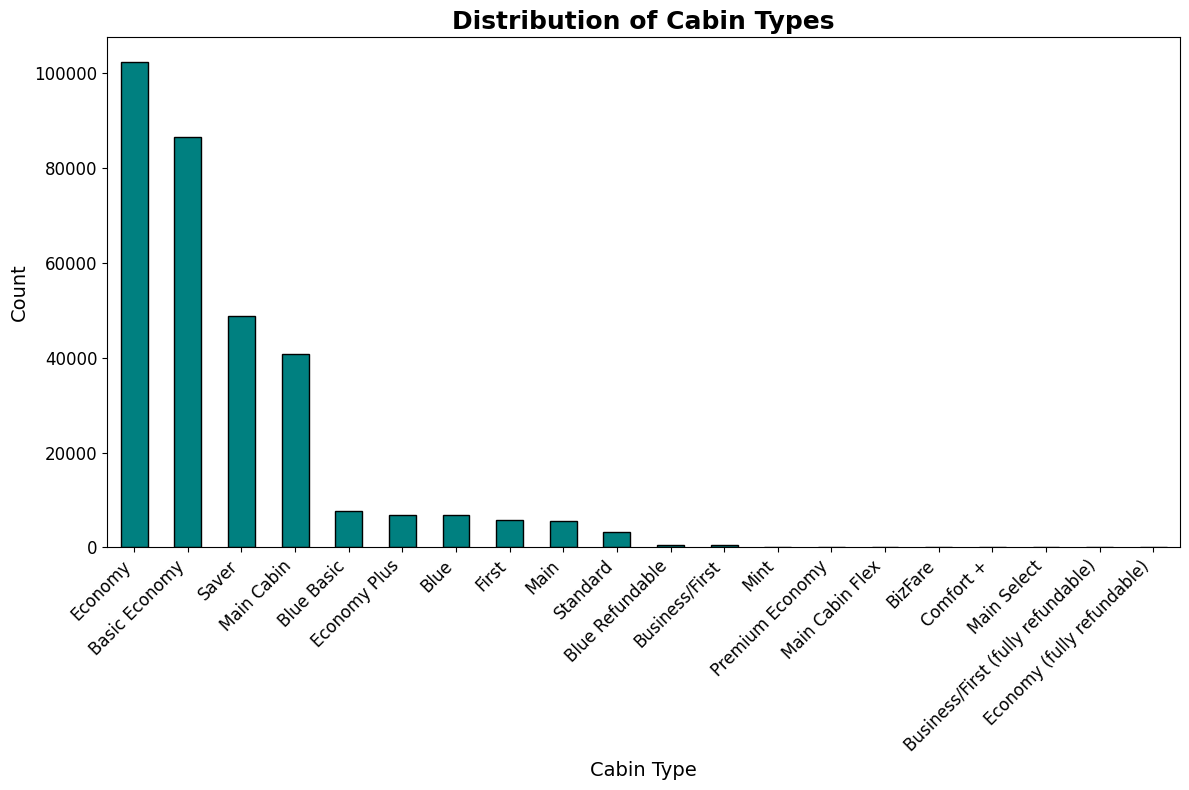

In [ ]:
# Plot the distribution of cabin types with customizations
plt.figure(figsize=(12, 8))
df_flight['Cabin'].value_counts().plot(kind='bar', color='teal', edgecolor='black')

# Add titles and labels with enhanced formatting
plt.title('Distribution of Cabin Types', fontsize=18, weight='bold')
plt.xlabel('Cabin Type', fontsize=14)
plt.ylabel('Count', fontsize=14)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right', fontsize=12)

# Enhance the y-axis ticks
plt.yticks(fontsize=12)



# Add tight layout to prevent clipping of tick-labels
plt.tight_layout()

# Show the plot
plt.show()


In [ ]:
df_flight['Cabin'].unique()

array(['Economy', 'Basic Economy', 'Blue Basic', 'Saver', 'Standard',
       'Main Cabin', 'Blue', 'Main', 'First', 'Mint', 'Economy Plus',
       'Blue Refundable', 'BizFare', 'Business/First', 'Main Cabin Flex',
       'Premium Economy', 'Main Select', 'Comfort +',
       'Business/First (fully refundable)', 'Economy (fully refundable)'],
      dtype=object)

In [ ]:
# Create the mapping dictionary
cabin_mapping = {
    # Economy Class
    'Economy': 'Economy',
    'Basic Economy': 'Economy',
    'Blue Basic': 'Economy',
    'Saver': 'Economy',
    'Standard': 'Economy',
    'Main Cabin': 'Economy',
    'Blue': 'Economy',
    'Main': 'Economy',
    'Economy Plus': 'Economy',
    'Blue Refundable': 'Economy',
    'Economy (fully refundable)': 'Economy',
    'Premium Economy': 'Economy',
    'Main Cabin Flex': 'Economy',
    'Main Select': 'Economy',
    'Comfort +': 'Economy',

    # Business Class
    'BizFare': 'Business',
    'Business/First': 'Business',
    'Business/First (fully refundable)': 'Business',

    # First Class
    'First': 'First',
    'Mint': 'First'
}

# Update the 'Cabin' column using the mapping
df_flight['Cabin'] = df_flight['Cabin'].map(cabin_mapping)


cabin_mapping = {
    # Economy Class
    'Economy': 1,

    # Business Class
    'Business': 2,

    # First Class
    'First': 3,
}

# Update the 'Cabin' column using the mapping
df_flight['Cabin'] = df_flight['Cabin'].map(cabin_mapping)


# Display the updated DataFrame
df_flight

,Flight Lands Next Day,Departure Airport,Arrival Airport,Number Of Stops,Route,Airline,Cabin,Price,DaysBeforeTravel,TravelTime
0,1,LAS,BOS,1,ATL,Spirit Airlines,1,83,16,15.250000
1,0,LAS,BOS,1,EWR,Spirit Airlines,1,100,16,10.150000
2,1,LAS,BOS,1,ATL,Spirit Airlines,1,78,16,15.250000
3,0,LAS,BOS,1,IAH,Spirit Airlines,1,100,16,11.116667
4,0,LAS,BOS,1,ORD,American Airlines,1,148,16,9.600000
...,...,...,...,...,...,...,...,...,...,...
317255,0,LAS,BOS,1,DEN,United Airlines,1,219,17,10.716667
317256,0,LAS,BOS,1,PHX,American Airlines,1,218,17,10.700000
317257,1,LAS,BOS,1,IAD,United Airlines,1,198,17,10.783333
317258,1,LAS,BOS,1,JFK,JetBlue,1,154,17,13.466667


In [ ]:
df_flight['Departure Airport'].unique()

array(['LAS', 'LAX', 'SFO', 'BOS', 'JFK', 'ORD'], dtype=object)

In [ ]:
# Create the mapping dictionary
airport_mapping = {
    'LAX': 1,
    'SFO': 2,
    'BOS': 3,
    'JFK': 4,
    'ORD': 5,
    'LAS': 6
}

# Update the 'Airport' column using the mapping
df_flight['Departure Airport'] = df_flight['Departure Airport'].map(airport_mapping)
df_flight['Arrival Airport'] = df_flight['Arrival Airport'].map(airport_mapping)

# Display the updated DataFrame
df_flight

,Flight Lands Next Day,Departure Airport,Arrival Airport,Number Of Stops,Route,Airline,Cabin,Price,DaysBeforeTravel,TravelTime
0,1,6,3,1,ATL,Spirit Airlines,1,83,16,15.250000
1,0,6,3,1,EWR,Spirit Airlines,1,100,16,10.150000
2,1,6,3,1,ATL,Spirit Airlines,1,78,16,15.250000
3,0,6,3,1,IAH,Spirit Airlines,1,100,16,11.116667
4,0,6,3,1,ORD,American Airlines,1,148,16,9.600000
...,...,...,...,...,...,...,...,...,...,...
317255,0,6,3,1,DEN,United Airlines,1,219,17,10.716667
317256,0,6,3,1,PHX,American Airlines,1,218,17,10.700000
317257,1,6,3,1,IAD,United Airlines,1,198,17,10.783333
317258,1,6,3,1,JFK,JetBlue,1,154,17,13.466667


In [ ]:
# modify the datafram to keep only top 5 airlines
top_5_airlines = df_flight['Airline'].value_counts().head(5).index
df_flight = df_flight[df_flight['Airline'].isin(top_5_airlines)]
df_flight

,Flight Lands Next Day,Departure Airport,Arrival Airport,Number Of Stops,Route,Airline,Cabin,Price,DaysBeforeTravel,TravelTime
0,1,6,3,1,ATL,Spirit Airlines,1,83,16,15.250000
1,0,6,3,1,EWR,Spirit Airlines,1,100,16,10.150000
2,1,6,3,1,ATL,Spirit Airlines,1,78,16,15.250000
3,0,6,3,1,IAH,Spirit Airlines,1,100,16,11.116667
4,0,6,3,1,ORD,American Airlines,1,148,16,9.600000
...,...,...,...,...,...,...,...,...,...,...
317254,1,6,3,1,PHL,American Airlines,1,148,17,11.250000
317255,0,6,3,1,DEN,United Airlines,1,219,17,10.716667
317256,0,6,3,1,PHX,American Airlines,1,218,17,10.700000
317257,1,6,3,1,IAD,United Airlines,1,198,17,10.783333


In [ ]:
top_5_airlines

Index(['United Airlines', 'Alaska Airlines', 'Delta', 'American Airlines',
       'Spirit Airlines'],
      dtype='object', name='Airline')

In [ ]:
# Create the mapping dictionary
airline_mapping = {
    'Alaska Airlines': 1,
    'Delta': 2,
    'American Airlines': 3,
    'Spirit Airlines': 4,
    'United Airlines': 5
}

# Update the 'airline' column using the mapping
df_flight['Airline'] = df_flight['Airline'].map(airline_mapping)

# Display the updated DataFrame
df_flight

,Flight Lands Next Day,Departure Airport,Arrival Airport,Number Of Stops,Route,Airline,Cabin,Price,DaysBeforeTravel,TravelTime
0,1,6,3,1,ATL,4,1,83,16,15.250000
1,0,6,3,1,EWR,4,1,100,16,10.150000
2,1,6,3,1,ATL,4,1,78,16,15.250000
3,0,6,3,1,IAH,4,1,100,16,11.116667
4,0,6,3,1,ORD,3,1,148,16,9.600000
...,...,...,...,...,...,...,...,...,...,...
317254,1,6,3,1,PHL,3,1,148,17,11.250000
317255,0,6,3,1,DEN,5,1,219,17,10.716667
317256,0,6,3,1,PHX,3,1,218,17,10.700000
317257,1,6,3,1,IAD,5,1,198,17,10.783333


In [ ]:
# check nuniq route
df_flight['Route'].nunique()

# count the length of the dataset for top 100 routes
df_flight['Route'].value_counts().head(50)

# drop Route
df_flight = df_flight.drop(['Route'], axis=1)

In [ ]:
df_flight

,Flight Lands Next Day,Departure Airport,Arrival Airport,Number Of Stops,Airline,Cabin,Price,DaysBeforeTravel,TravelTime
0,1,6,3,1,4,1,83,16,15.250000
1,0,6,3,1,4,1,100,16,10.150000
2,1,6,3,1,4,1,78,16,15.250000
3,0,6,3,1,4,1,100,16,11.116667
4,0,6,3,1,3,1,148,16,9.600000
...,...,...,...,...,...,...,...,...,...
317254,1,6,3,1,3,1,148,17,11.250000
317255,0,6,3,1,5,1,219,17,10.716667
317256,0,6,3,1,3,1,218,17,10.700000
317257,1,6,3,1,5,1,198,17,10.783333


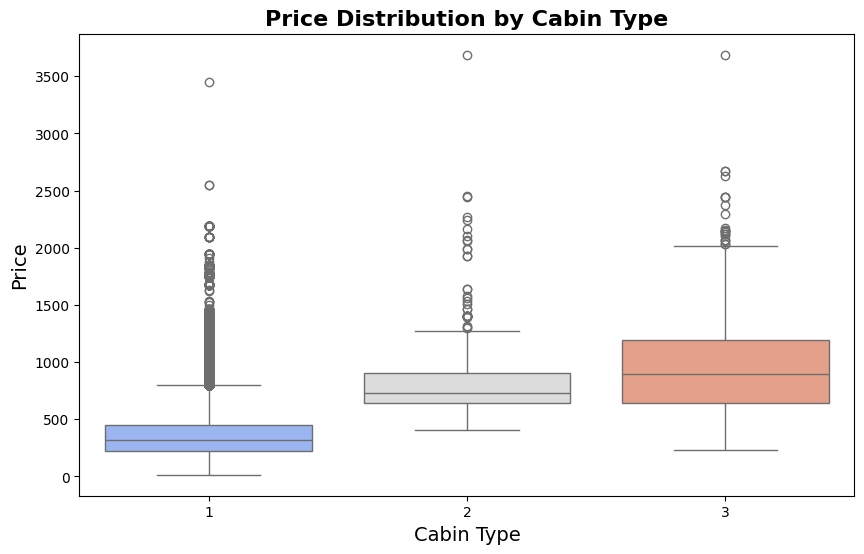

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Cabin', y='Price', data=df_flight, palette='coolwarm')
plt.title('Price Distribution by Cabin Type', fontsize=16, weight='bold')
plt.xlabel('Cabin Type', fontsize=14)
plt.ylabel('Price', fontsize=14)
plt.show()


####Insights :
Higher cabin types correspond to higher median prices, with Cabin Type 3 being the most expensive and Cabin Type 1 the least.

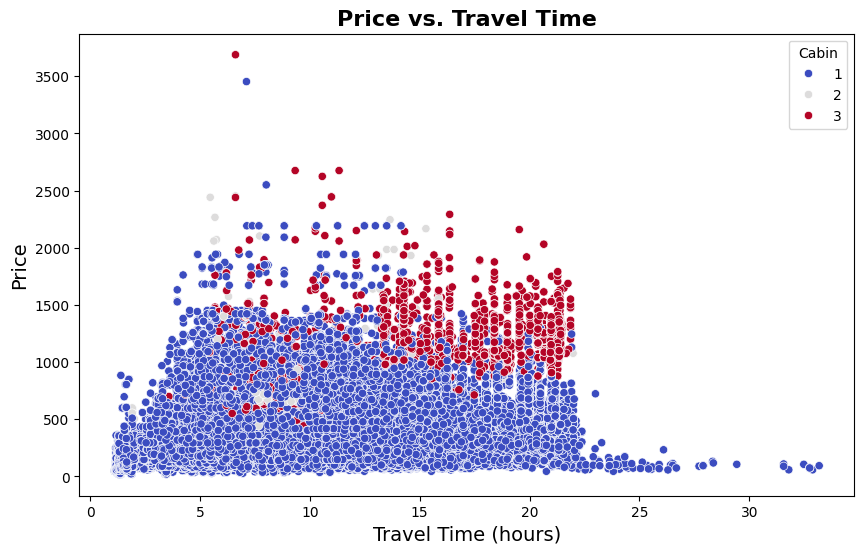

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='TravelTime', y='Price', data=df_flight, hue='Cabin', palette='coolwarm')
plt.title('Price vs. Travel Time', fontsize=16, weight='bold')
plt.xlabel('Travel Time (hours)', fontsize=14)
plt.ylabel('Price', fontsize=14)
plt.show()


#### Insights :
The scatter plot shows that most flights, especially those in Cabin Type 1 (blue), cluster around lower prices and shorter travel times. Cabin Type 3 (red) flights tend to have higher prices and are more spread out across longer travel times. There's no clear linear relationship between travel time and price, but higher cabin types generally command higher prices regardless of travel time.

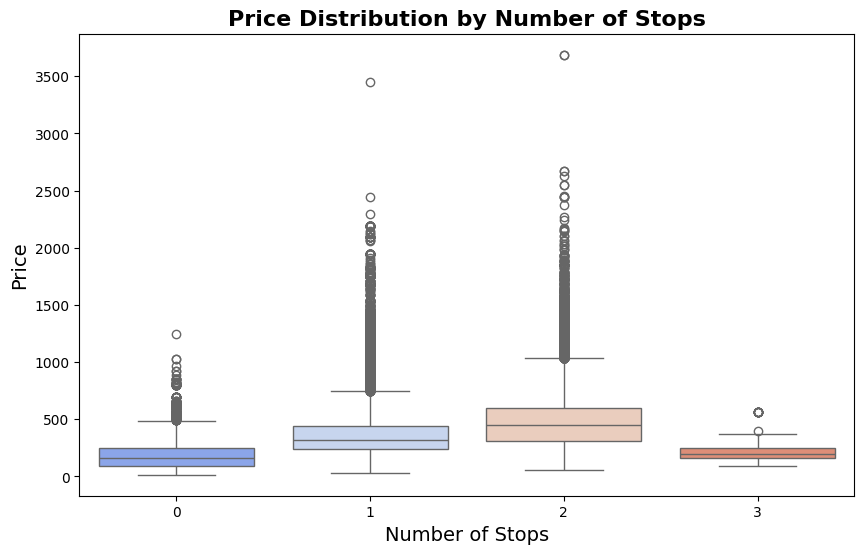

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Number Of Stops', y='Price', data=df_flight, palette='coolwarm')
plt.title('Price Distribution by Number of Stops', fontsize=16, weight='bold')
plt.xlabel('Number of Stops', fontsize=14)
plt.ylabel('Price', fontsize=14)
plt.show()


#### Insights :
Flights with more stops generally have higher median prices, with 1-stop flights showing the most price variability. Direct flights are the cheapest, while 3-stop flights have lower median prices than 1- or 2-stop flights but still show some outliers.

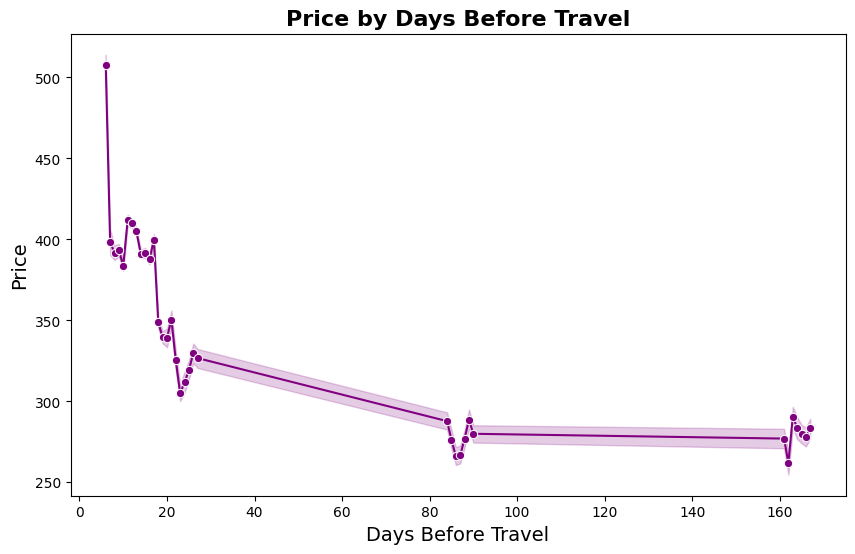

In [ ]:
plt.figure(figsize=(10, 6))
sns.lineplot(x='DaysBeforeTravel', y='Price', data=df_flight, marker='o', color='purple')
plt.title('Price by Days Before Travel', fontsize=16, weight='bold')
plt.xlabel('Days Before Travel', fontsize=14)
plt.ylabel('Price', fontsize=14)
plt.show()


####Insights :
Flight prices generally decrease as the number of days before travel increases, with the steepest drop occurring within the first 20 days. Prices stabilize around 80 days before travel.

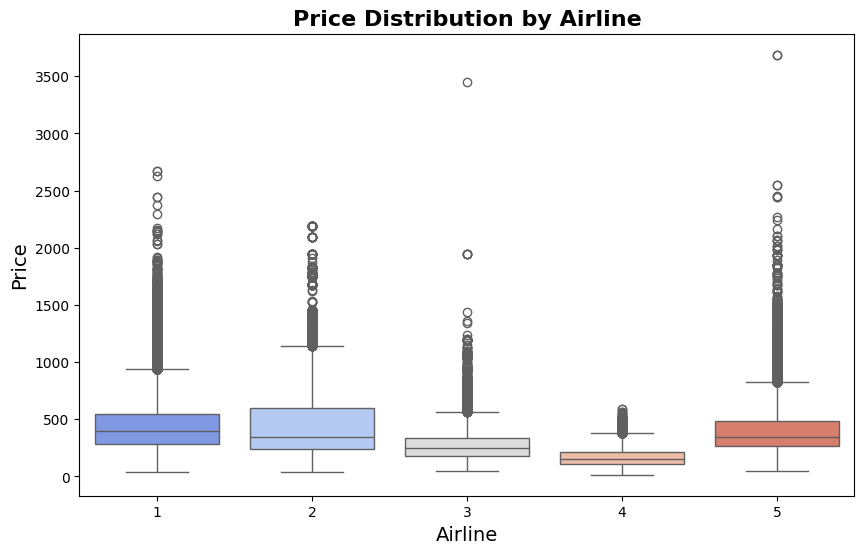

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Airline', y='Price', data=df_flight, palette='coolwarm')
plt.title('Price Distribution by Airline', fontsize=16, weight='bold')
plt.xlabel('Airline', fontsize=14)
plt.ylabel('Price', fontsize=14)
plt.show()


####Insights :
Airline 3 has the widest price range and the most outliers, indicating high variability, while Airline 4 has the lowest median prices. Airlines 1 and 2 have similar price distributions, with moderate variability.

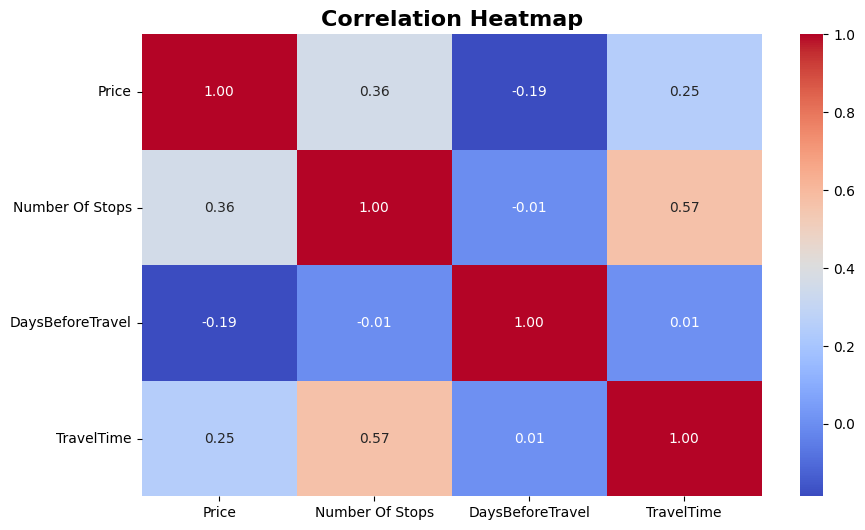

In [ ]:
plt.figure(figsize=(10, 6))
corr = df_flight[['Price', 'Number Of Stops', 'DaysBeforeTravel', 'TravelTime']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap', fontsize=16, weight='bold')
plt.show()


#### Insights :
Number of Stops correlates positively with both Price and Travel Time, while Price decreases as the booking date is further from the travel date.

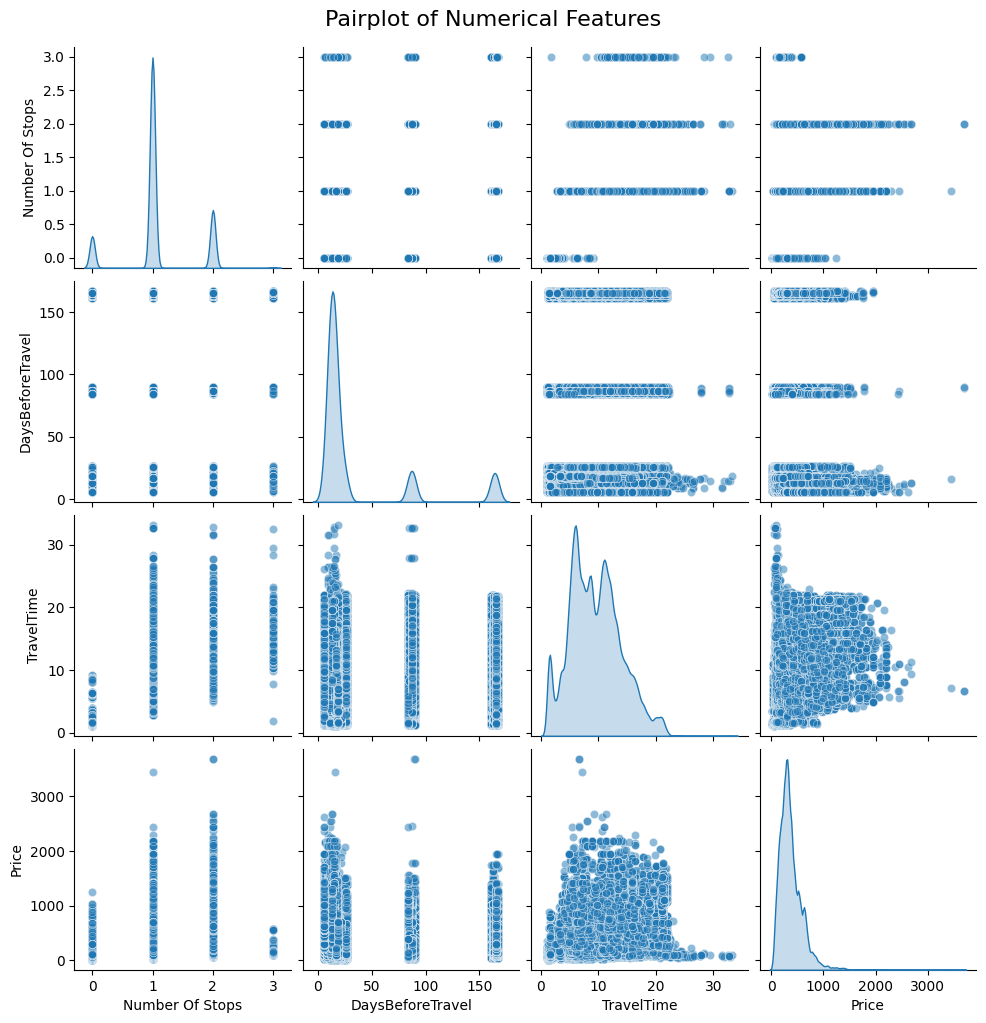

In [ ]:
# Selecting the columns of interest
cols_of_interest = ['Number Of Stops', 'DaysBeforeTravel', 'TravelTime', 'Price']

# Creating the pairplot
sns.pairplot(df_flight[cols_of_interest], diag_kind='kde', plot_kws={'alpha':0.5})

# Display the plot
plt.suptitle('Pairplot of Numerical Features', y=1.02, fontsize=16)
plt.show()


#### Insights :
Number of Stops and Travel Time are positively correlated.

Price has a slight positive correlation with Number of Stops and Travel Time.

Days Before Travel shows no strong linear relationships with other variables.

## Split Independent and dependent features

In [ ]:
# divide x and y
x = df_flight.drop(['Price'], axis=1)
y = df_flight['Price']
y

,Price
0,83
1,100
2,78
3,100
4,148
...,...
317254,148
317255,219
317256,218
317257,198


In [ ]:
x['Flight Lands Next Day'].unique()

array([1, 0])

In [ ]:
x['Departure Airport'].unique()

array([6, 1, 2, 3, 4, 5])

In [ ]:
x['Arrival Airport'].unique()

array([3, 5, 4, 1, 6, 2])

In [ ]:
x['Number Of Stops'].unique()

array([1, 0, 2, 3])

In [ ]:
x['Airline'].unique()

array([4, 3, 5, 2, 1])

In [ ]:
x['Cabin'].unique()

array([1, 3, 2])

In [ ]:
x['DaysBeforeTravel'].unique()

array([ 16,  14,  10,  12,  18,  15,  13,   9,  11,  88,  23, 161, 164,
         8,   7, 166,  27,  17,  20,  19,  22, 163,  25,  26,  85,  86,
        84,  24,  21, 162,  89, 165,   6, 167,  90,  87])

In [ ]:
x['TravelTime'].unique()

array([15.25      , 10.15      , 11.11666667, ..., 22.56666667,
       21.13333333, 23.        ])

## Train & Test dataset split

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
x_train

,Flight Lands Next Day,Departure Airport,Arrival Airport,Number Of Stops,Airline,Cabin,DaysBeforeTravel,TravelTime
0,0.0,0.8,0.4,0.333333,1.00,0.0,0.062112,0.265073
1,1.0,1.0,0.8,0.666667,0.00,0.0,0.111801,0.436590
2,0.0,0.4,1.0,0.333333,0.00,0.0,0.074534,0.240644
3,1.0,1.0,0.6,0.666667,0.00,0.0,0.981366,0.451143
4,0.0,0.4,1.0,0.333333,0.25,0.0,0.037267,0.173597
...,...,...,...,...,...,...,...,...
234261,0.0,0.2,0.6,0.000000,0.25,0.0,0.024845,0.245322
234262,0.0,0.8,0.2,0.000000,1.00,0.0,0.987578,0.050936
234263,0.0,1.0,0.8,0.666667,1.00,0.0,0.093168,0.380457
234264,0.0,0.8,1.0,0.333333,1.00,0.0,0.503106,0.220894


##Scalling the dataset

In [ ]:
cols = x_train.columns
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_train = pd.DataFrame(x_train, columns=cols)
x_test = scaler.transform(x_test)
x_test = pd.DataFrame(x_test, columns=cols)
x_train

,Flight Lands Next Day,Departure Airport,Arrival Airport,Number Of Stops,Airline,Cabin,DaysBeforeTravel,TravelTime
0,0.0,0.8,0.4,0.333333,1.00,0.0,0.062112,0.265073
1,1.0,1.0,0.8,0.666667,0.00,0.0,0.111801,0.436590
2,0.0,0.4,1.0,0.333333,0.00,0.0,0.074534,0.240644
3,1.0,1.0,0.6,0.666667,0.00,0.0,0.981366,0.451143
4,0.0,0.4,1.0,0.333333,0.25,0.0,0.037267,0.173597
...,...,...,...,...,...,...,...,...
234261,0.0,0.2,0.6,0.000000,0.25,0.0,0.024845,0.245322
234262,0.0,0.8,0.2,0.000000,1.00,0.0,0.987578,0.050936
234263,0.0,1.0,0.8,0.666667,1.00,0.0,0.093168,0.380457
234264,0.0,0.8,1.0,0.333333,1.00,0.0,0.503106,0.220894


## Model Train & Test

### Models
Base Model : Ordinary Least Squares (OLS) Linear Regression

Other Model : Ridge Regressor,Lasso Regressor,Gradient Boosting Regressor,XGBoost Regressor,Random Forest Regressor

In [122]:
model = sm.OLS(y_train.values, x_train).fit()
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.781
Model:                            OLS   Adj. R-squared (uncentered):              0.781
Method:                 Least Squares   F-statistic:                          1.047e+05
Date:                Sat, 17 Aug 2024   Prob (F-statistic):                        0.00
Time:                        02:21:06   Log-Likelihood:                     -1.5724e+06
No. Observations:              234266   AIC:                                  3.145e+06
Df Residuals:                  234258   BIC:                                  3.145e+06
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
                            coef    std err          t      P>|t|      [0.025      0.975]
------------------------------

<Axes: >

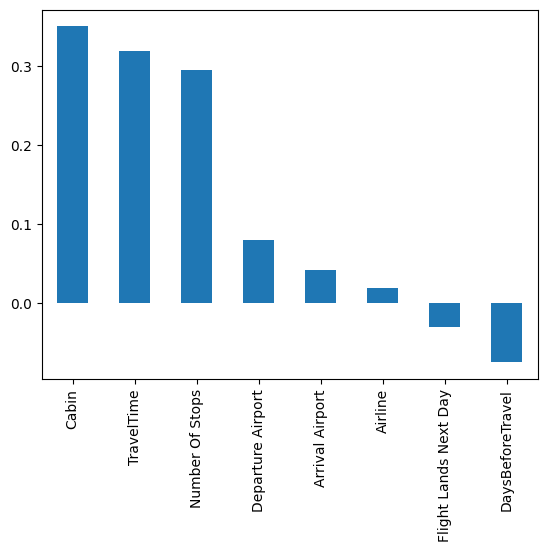

In [123]:
# scale coefficients to total 100% and display bar plot in sorted order
coefficients = model.params
coefficients = coefficients / coefficients.sum()
coefficients = coefficients.sort_values(ascending=False)
coefficients.plot(kind='bar')

In [132]:
# test
y_pred = model.predict(x_test)

# compare accuracy
mean_squared_error(y_test, y_pred)

# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Create a DataFrame to store the results
results_df = pd.DataFrame({
    "Model": ["OLS Linear Regression"],
    "MAE": [mae],
    "MSE": [mse],
    "R²": [r2]
})

# Display the DataFrame
print(results_df)

                   Model         MAE           MSE        R²
0  OLS Linear Regression  143.637925  39266.773539  0.160704


### Ridge Regressor

In [ ]:
# Initialize different regression models
alphas = [0.001, 0.01, 0.1, 1, 10, 100, 1000]

# Dictionary to store results
results = {}

# Train and evaluate each model

for a in tqdm(alphas):
    # Train the model
    model = Ridge(alpha=a)
    model.fit(x_train, y_train)

    # Predict on the test set
    y_pred = model.predict(x_test)

    # Calculate evaluation metrics
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    # Store the results
    results[a] = {
        "alpha": a,
        "MAE": mae,
        "MSE": mse,
        "R2": r2
    }

# Compare the models
ridge_df = pd.DataFrame(results).T  # Transpose for better readability

print(ridge_df)


100%|██████████| 7/7 [00:00<00:00, 18.27it/s]

             alpha         MAE           MSE        R2
0.001        0.001  133.398358  32999.321243  0.294666
0.010        0.010  133.398361  32999.321004  0.294666
0.100        0.100  133.398394  32999.318609  0.294666
1.000        1.000  133.398720  32999.294944  0.294666
10.000      10.000  133.401990  32999.086094  0.294671
100.000    100.000  133.436550  32999.670789  0.294658
1000.000  1000.000  134.017863  33193.454767  0.290516


<Axes: xlabel='alpha'>

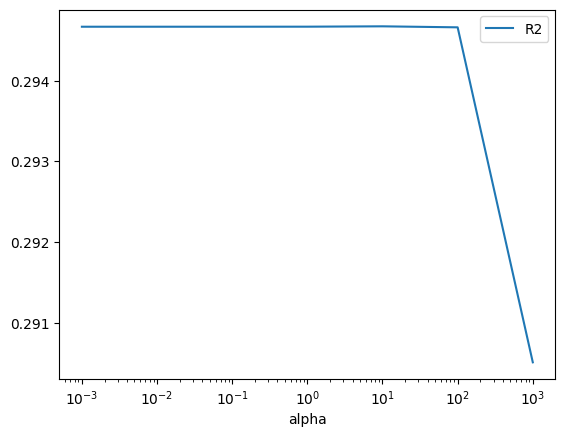

In [ ]:
ridge_df.sort_values(by='R2', ascending=False)

# log plot alpha vs r2 for ridge_df
ridge_df.plot(x='alpha', y='R2', logx=True)

### Lasso Regressor

In [ ]:
# Initialize different regression models
alphas = [0.001, 0.01, 0.1, 1, 10, 100, 1000]

# Dictionary to store results
results = {}

# Train and evaluate each model

for a in tqdm(alphas):
    # Train the model
    model = Lasso(alpha=a)
    model.fit(x_train, y_train)

    # Predict on the test set
    y_pred = model.predict(x_test)

    # Calculate evaluation metrics
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    # Store the results
    results[a] = {
        "alpha": a,
        "MAE": mae,
        "MSE": mse,
        "R2": r2
    }

# Compare the models
lasso_df = pd.DataFrame(results).T  # Transpose for better readability

print(lasso_df)


100%|██████████| 7/7 [00:00<00:00,  7.53it/s]

             alpha         MAE           MSE        R2
0.001        0.001  133.398588  32999.328345  0.294666
0.010        0.010  133.400702  32999.409445  0.294664
0.100        0.100  133.425281  33001.943386  0.294610
1.000        1.000  134.104746  33199.434210  0.290388
10.000      10.000  152.505258  42582.796391  0.089826
100.000    100.000  160.362272  46786.444860 -0.000023
1000.000  1000.000  160.362272  46786.444860 -0.000023


<Axes: xlabel='alpha'>

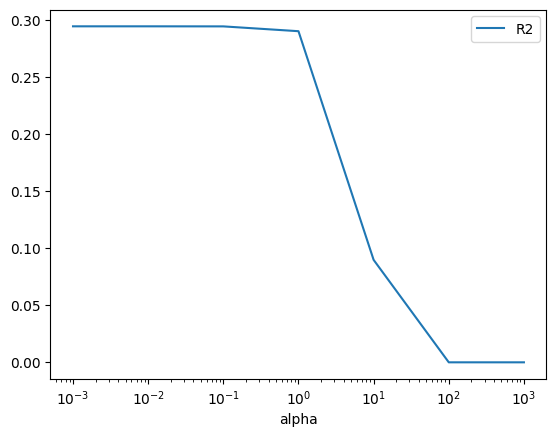

In [ ]:
lasso_df.sort_values(by='R2', ascending=False)

# log plot alpha vs r2 for ridge_df
lasso_df.plot(x='alpha', y='R2', logx=True)

## All other models

In [ ]:
# Initialize different regression models
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(alpha=1.0),
    "Lasso Regression": Lasso(alpha=0.1),
    #"Support Vector Regressor": SVR(),
    "Random Forest Regression": RandomForestRegressor(n_estimators=100, random_state=42),
    "Gradient Boosting Regression": GradientBoostingRegressor(n_estimators=100, random_state=42),
    "XGBoost Regression": XGBRegressor(n_estimators=100, random_state=42)
}

# Dictionary to store results
results = {}

# Train and evaluate each model
for model_name, model in models.items():
    # Train the model
    model.fit(x_train, y_train)

    # Predict on the test set
    y_pred = model.predict(x_test)

    # Calculate evaluation metrics
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    residuals = y_pred - y_test
    residuals_pct = (residuals / y_test) * 100

    # Store the results
    results[model_name] = {

        "MAE": mae,
        "MSE": mse,
        "R2": r2,
    }



# Compare the models
results_df = pd.DataFrame(results).T  # Transpose for better readability

print(results_df)


                                     MAE           MSE        R2
Linear Regression             133.398358  32999.321270  0.294666
Ridge Regression              133.398720  32999.294944  0.294666
Lasso Regression              133.425281  33001.943386  0.294610
Random Forest Regression       65.585396  11882.638877  0.746018
Gradient Boosting Regression   99.351159  19044.306403  0.592943
XGBoost Regression             78.051359  12639.643136  0.729838


#### Insights :
The results from your model comparisons show that non-linear models significantly outperform linear models in predicting flight prices.

Random Forest Regression is the best-performing model for your flight price prediction dataset, with an R² of 0.7304, significantly outperforming the linear models. It provides the most accurate predictions with the lowest errors (MAE and MSE), indicating it's well-suited for capturing the data's complexity.


In [ ]:
# Initialize Random Forest Regressor
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the model on the training data
model.fit(x_train, y_train)

# Predict on the test set
y_pred = model.predict(x_test)

# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Store the results
results = {
    "MAE": mae,
    "MSE": mse,
    "R2": r2,
}

# Calculate feature importance using impurity reduction
feature_importance = model.feature_importances_

# Map feature importances to feature names
importance_df = pd.DataFrame({
    'Feature': x_train.columns,
    'Importance': feature_importance
}).sort_values(by='Importance', ascending=False)

# Display the results
results_df = pd.DataFrame([results])
print("Model Performance Metrics:")
print(results_df)

print("\nFeature Importance:")
print(importance_df)


Model Performance Metrics:
         MAE           MSE        R2
0  65.585396  11882.638877  0.746018

Feature Importance:
                 Feature  Importance
7             TravelTime    0.234721
5                  Cabin    0.161273
4                Airline    0.148699
6       DaysBeforeTravel    0.143042
3        Number Of Stops    0.116327
1      Departure Airport    0.095928
2        Arrival Airport    0.090362
0  Flight Lands Next Day    0.009647


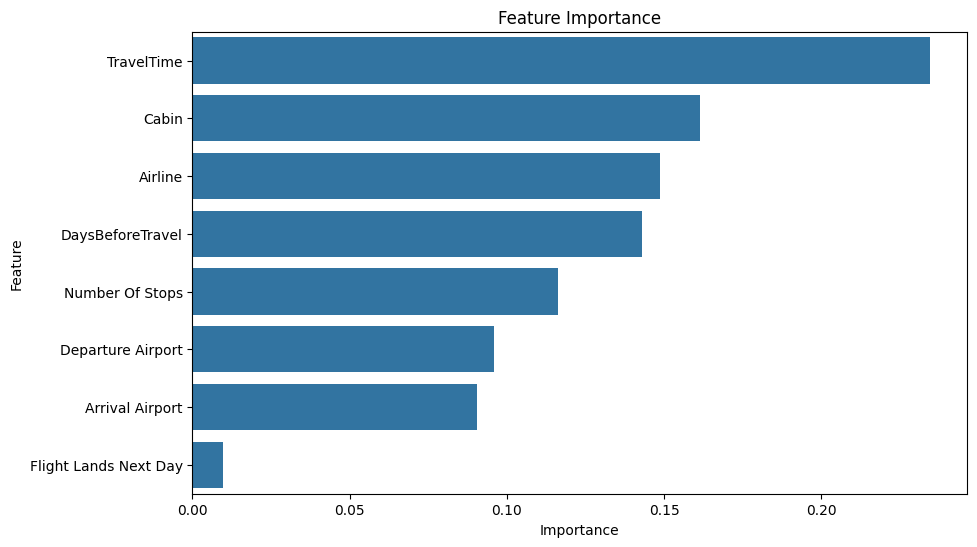

In [ ]:
# Plot the feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importance')
plt.show()

#### Insights :
The Random Forest model performed well with an R² of 0.7304, indicating strong predictive power. The feature importance analysis reveals that "TravelTime" is the most influential feature, followed by "Airline" and "Number of Stops." These top three features significantly contribute to the model's ability to predict flight prices accurately. Lesser importance is given to features like "Cabin" and "Flight Lands Next Day," which have minimal impact on the predictions. This insight helps focus on the key factors that drive flight pricing in your dataset.

In [ ]:
residuals = y_pred - y_test
residuals_pct = (residuals / y_test) * 100



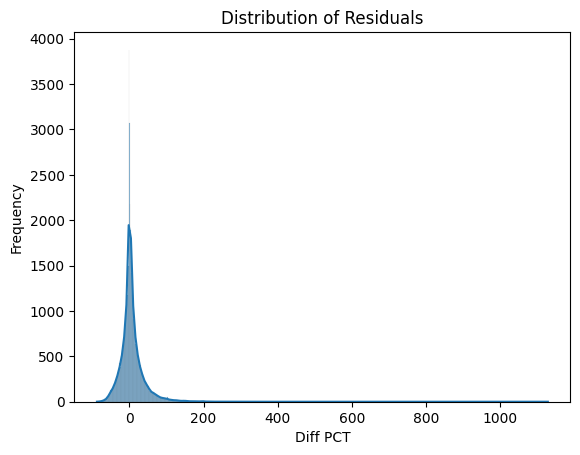

In [ ]:
sns.histplot(residuals_pct, kde=True)
plt.title('Distribution of Residuals')
plt.xlabel('Diff PCT')
plt.ylabel('Frequency')
plt.show()

#### Insights :
The residuals plot shows that most predictions are close to the actual values, with a sharp peak near zero. However, there are some outliers with large errors, indicating the model performs well on average but may struggle with certain predictions.

# Save the model

In [ ]:
import os
from joblib import dump

# Create the directory if it doesn't exist
os.makedirs('artifacts', exist_ok=True)

# Save the model data
model_data = {
    'model': model ,
    'scaler': scaler,
}

dump(model_data, 'artifacts/model_data.joblib')

['artifacts/model_data.joblib']

In [ ]:
x.columns

Index(['Flight Lands Next Day', 'Departure Airport', 'Arrival Airport',
       'Number Of Stops', 'Airline', 'Cabin', 'DaysBeforeTravel',
       'TravelTime'],
      dtype='object')

In [ ]:
y

,Price
0,83
1,100
2,78
3,100
4,148
...,...
317254,148
317255,219
317256,218
317257,198
